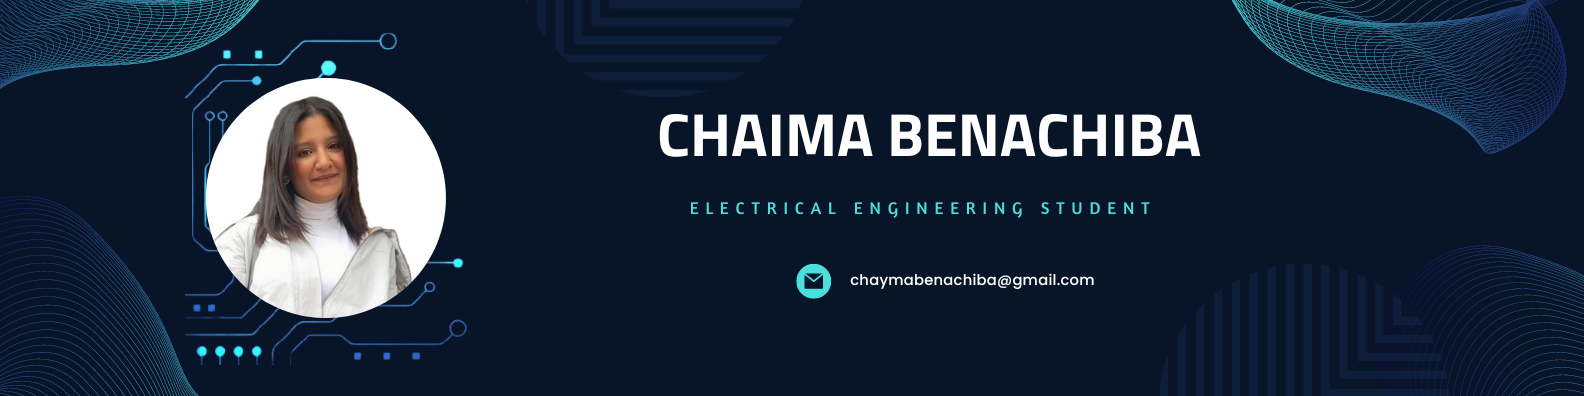

#MACHINE LEARNING INTERNSHIP


# Developed By - Chaima Ben Achiba
## Submitted to Cognorise Infotech




### TASK 2: House Price Prediction

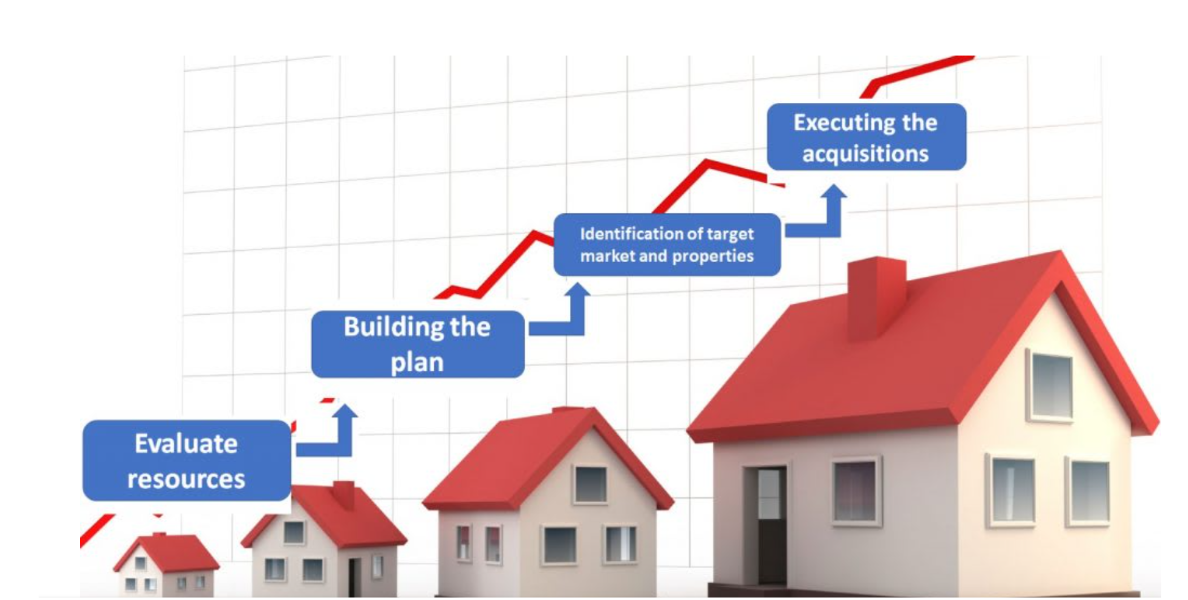

**#Setup and Data Preparation**

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
import missingno as msno

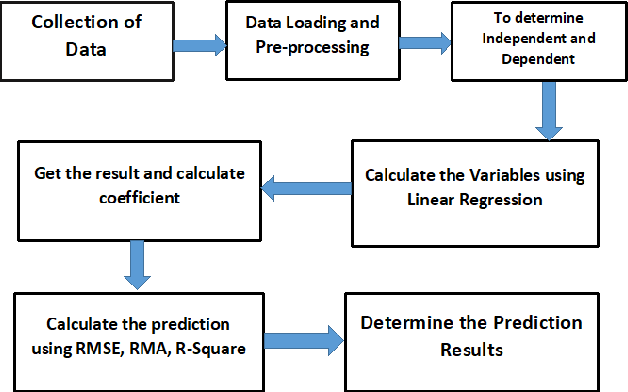

In [3]:
df = pd.read_csv('data.csv')

In [ ]:
#first 5 rows dataframe
df.head()

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    street       city  statezip country  
0          2005      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1             0           709 W Blaine St    Seattle  WA 98119     USA  
2             0  26206-26214 143rd Ave SE       Kent  WA 98042     USA  
3             0           857 170th Pl NE   Bellevue  WA 98008     USA  
4          1992         9105 170th Ave NE    Redmond  WA 98052     USA

In [ ]:
#last 5 rows dataframe
df.tail()

date          price  bedrooms  bathrooms  sqft_living  \
4595  2014-07-09 00:00:00  308166.666667       3.0       1.75         1510   
4596  2014-07-09 00:00:00  534333.333333       3.0       2.50         1460   
4597  2014-07-09 00:00:00  416904.166667       3.0       2.50         3010   
4598  2014-07-10 00:00:00  203400.000000       4.0       2.00         2090   
4599  2014-07-10 00:00:00  220600.000000       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
4595      6360     1.0           0     0          4        1510   
4596      7573     2.0           0     0          3        1460   
4597      7014     2.0           0     0          3        3010   
4598      6630     1.0           0     0          3        1070   
4599      8102     2.0           0     0          4        1490   

      sqft_basement  yr_built  yr_renovated             street       city  \
4595              0      1954          1979     501 N 143rd St    Seattle   
4596              0      1983          2009   14855 SE 10th Pl   Bellevue   
4597              0      2009             0   759 Ilwaco Pl NE     Renton   
4598           1020      1974             0  5148 S Creston St    Seattle   
4599              0      1990             0  18717 SE 258th St  Covington   

      statezip country  
4595  WA 98133     USA  
4596  WA 98007     USA  
4597  WA 98059     USA  
4598  WA 98178     USA  
4599  WA 98042     USA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [ ]:
# Count of null value in each column
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

<Axes: >

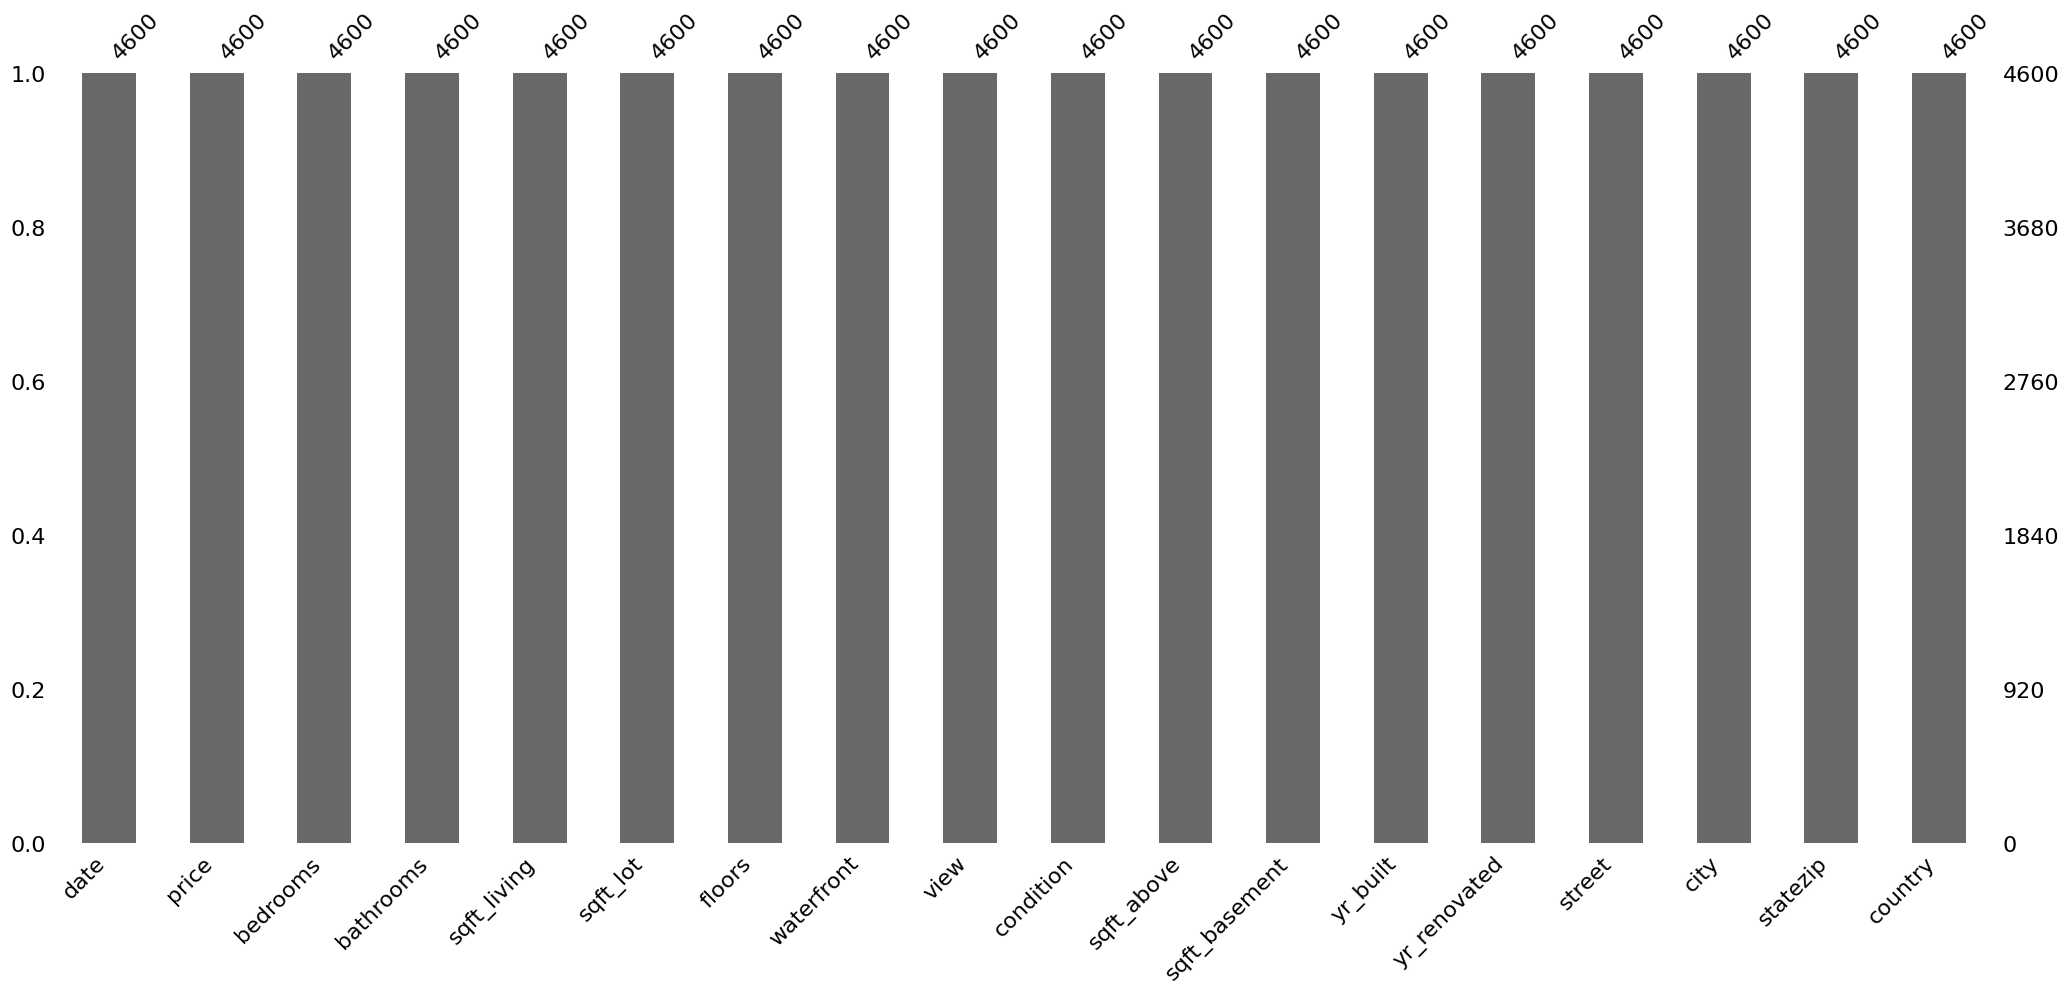

In [ ]:
# visualizing null values
msno.bar(df)

In [ ]:
#get number of rows and columns
df.shape

(4600, 18)

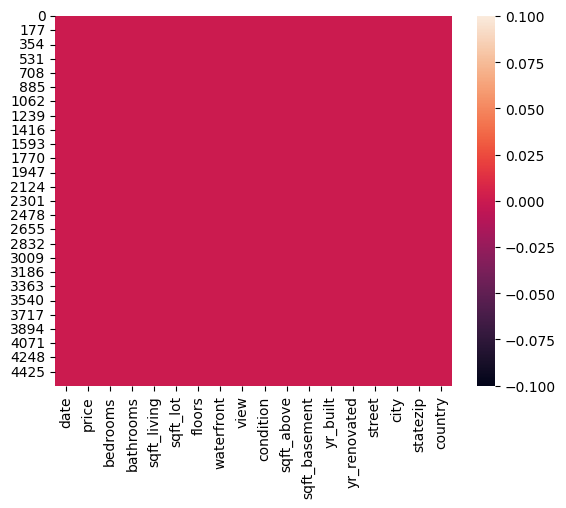

In [ ]:
sns.heatmap(df.isnull())
plt.show()

In [ ]:
#some statistical measures of data
df.describe()

price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.600000e+03  4600.000000  4600.000000   4600.000000  4.600000e+03   
mean   5.519630e+05     3.400870     2.160815   2139.346957  1.485252e+04   
std    5.638347e+05     0.908848     0.783781    963.206916  3.588444e+04   
min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
25%    3.228750e+05     3.000000     1.750000   1460.000000  5.000750e+03   
50%    4.609435e+05     3.000000     2.250000   1980.000000  7.683000e+03   
75%    6.549625e+05     4.000000     2.500000   2620.000000  1.100125e+04   
max    2.659000e+07     9.000000     8.000000  13540.000000  1.074218e+06   

            floors   waterfront         view    condition   sqft_above  \
count  4600.000000  4600.000000  4600.000000  4600.000000  4600.000000   
mean      1.512065     0.007174     0.240652     3.451739  1827.265435   
std       0.538288     0.084404     0.778405     0.677230   862.168977   
min       1.000000     0.000000     0.000000     1.000000   370.000000   
25%       1.000000     0.000000     0.000000     3.000000  1190.000000   
50%       1.500000     0.000000     0.000000     3.000000  1590.000000   
75%       2.000000     0.000000     0.000000     4.000000  2300.000000   
max       3.500000     1.000000     4.000000     5.000000  9410.000000   

       sqft_basement     yr_built  yr_renovated  
count    4600.000000  4600.000000   4600.000000  
mean      312.081522  1970.786304    808.608261  
std       464.137228    29.731848    979.414536  
min         0.000000  1900.000000      0.000000  
25%         0.000000  1951.000000      0.000000  
50%         0.000000  1976.000000      0.000000  
75%       610.000000  1997.000000   1999.000000  
max      4820.000000  2014.000000   2014.000000

In [4]:
# Data type of each column
df.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [5]:
# Handle missing values
df = df.dropna()

In [6]:
# Split the data into features and target
X = df.drop('price', axis=1)
y = df['price']

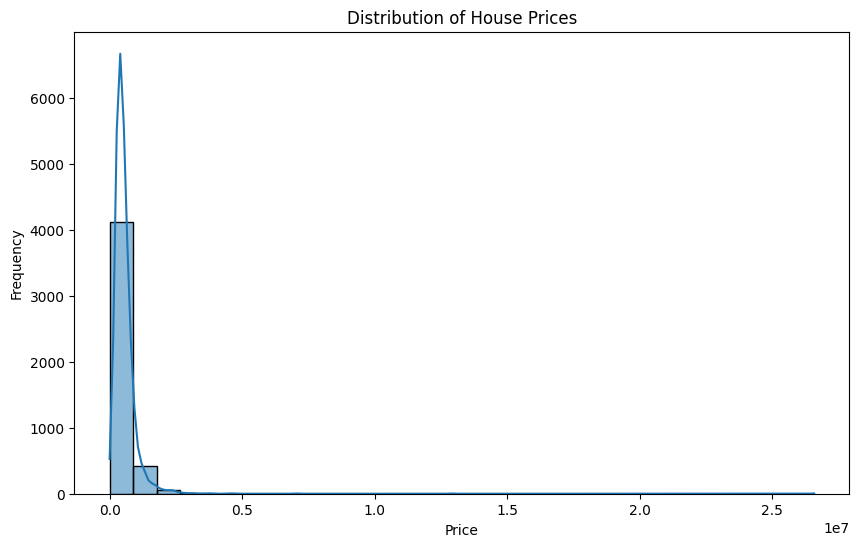

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(y, bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

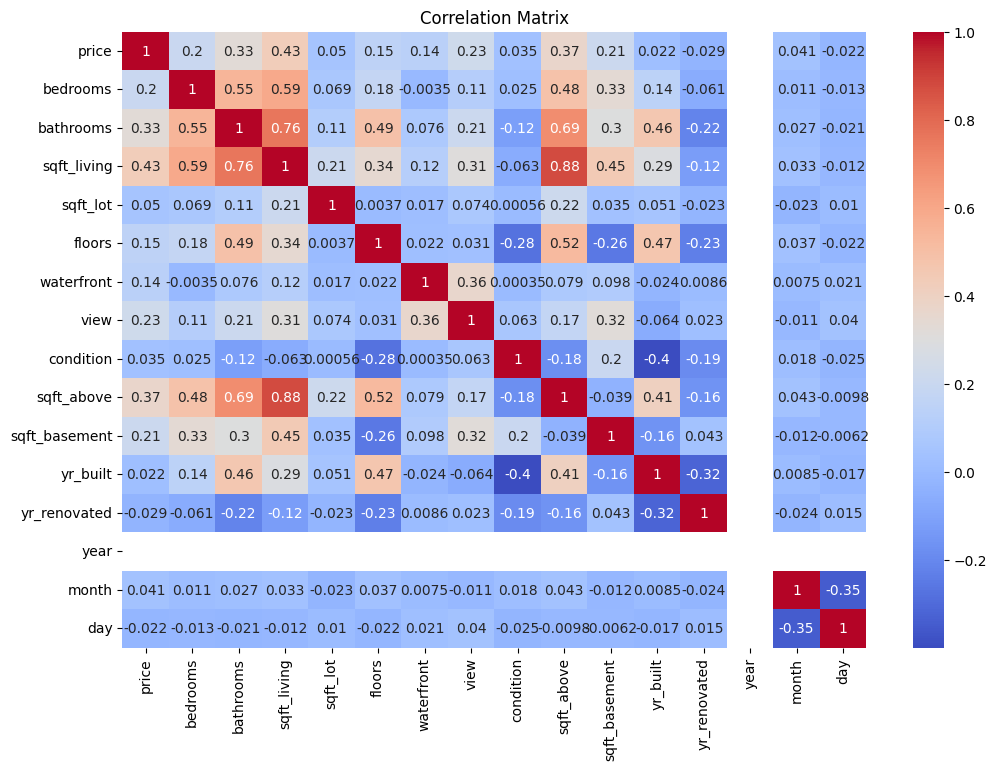

In [ ]:
# Convert the 'date' column to datetime objects if it exists
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])

    # Extract numerical features from the date
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day

    # Drop the original 'date' column
    df = df.drop('date', axis=1)

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_df.corr()  # Calculate correlation on numeric columns only
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

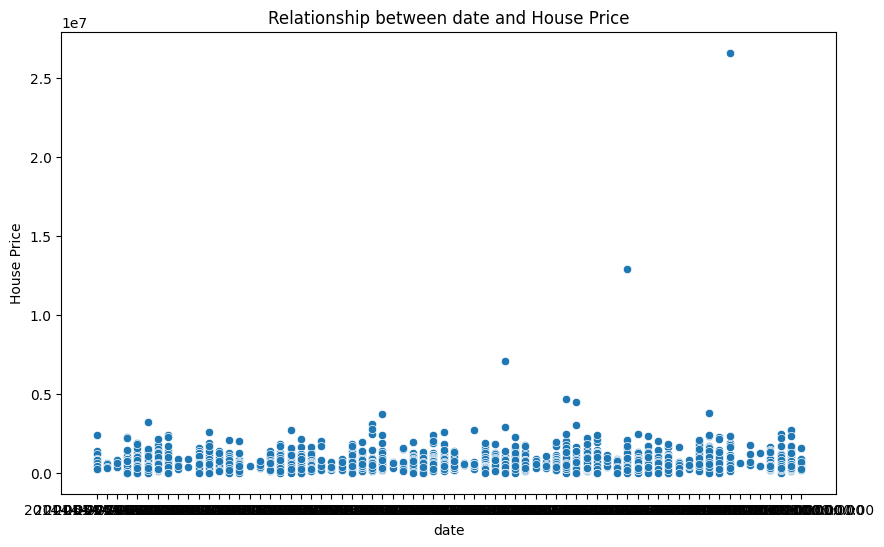

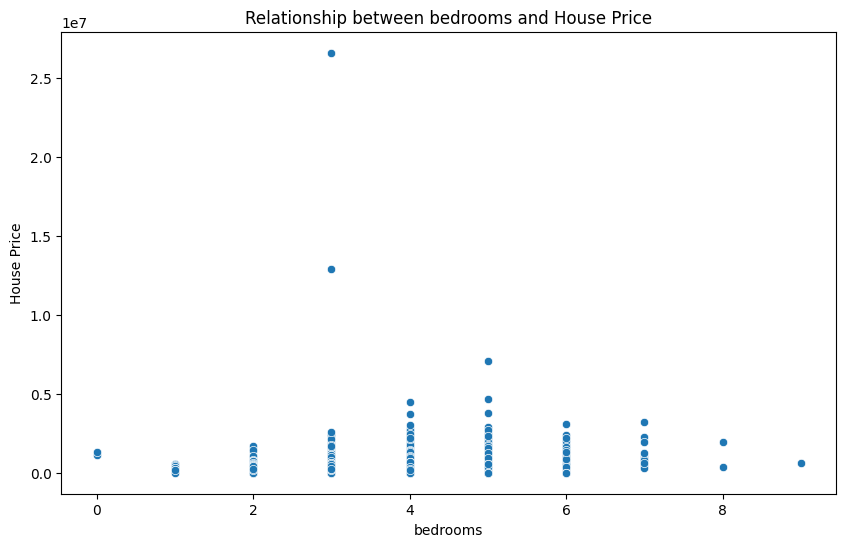

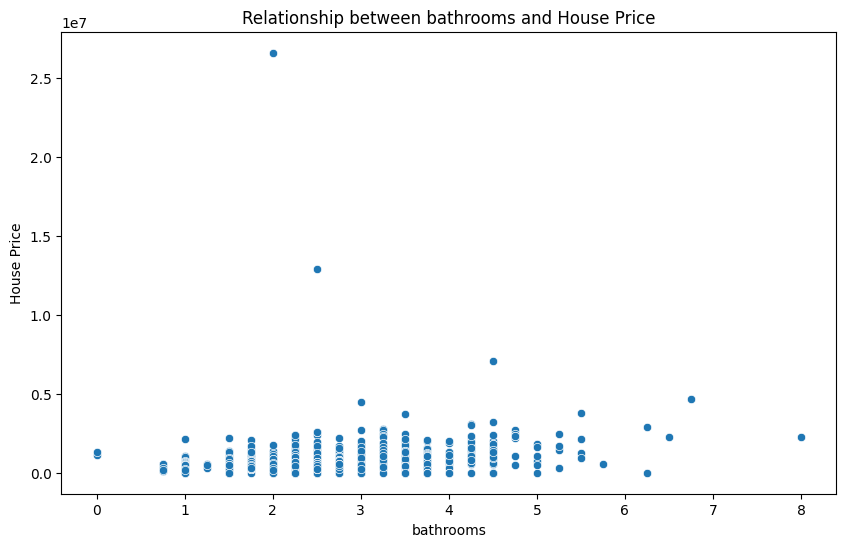

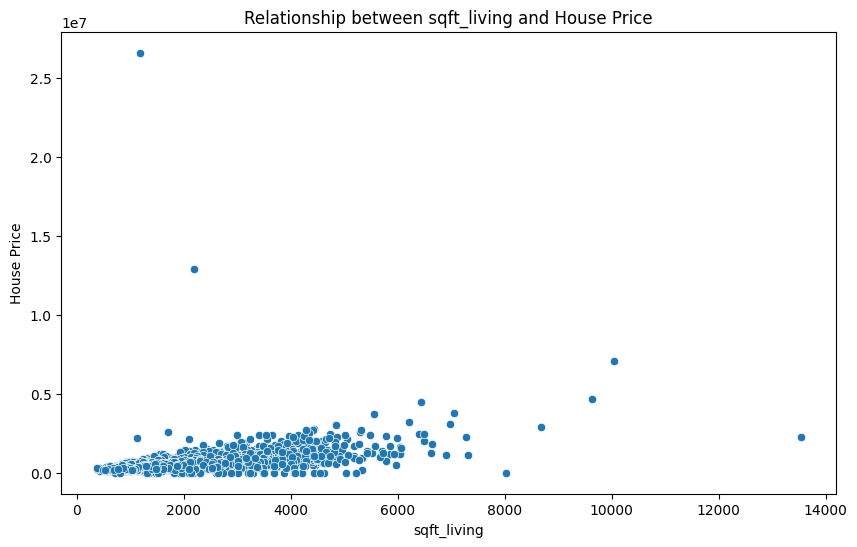

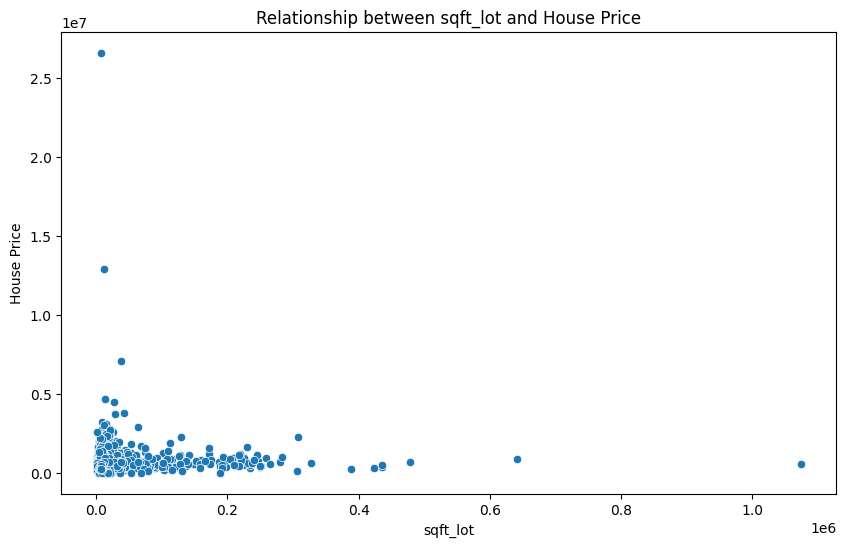

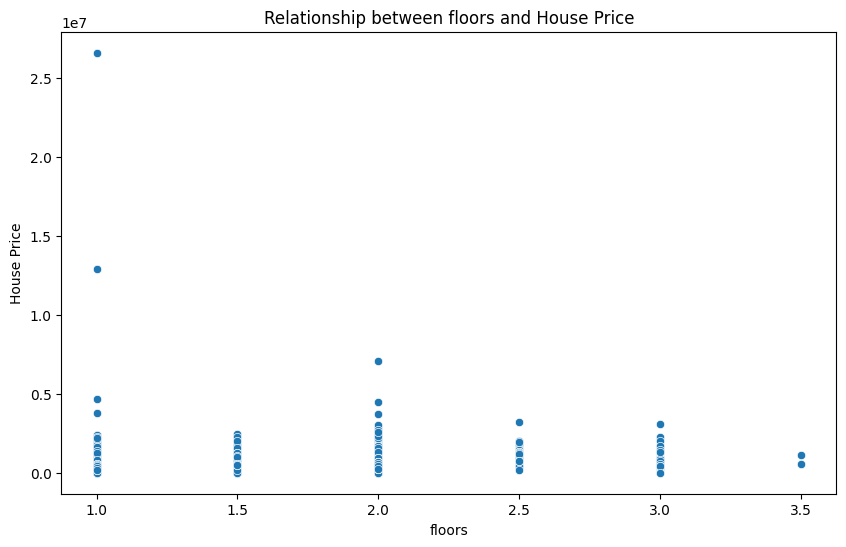

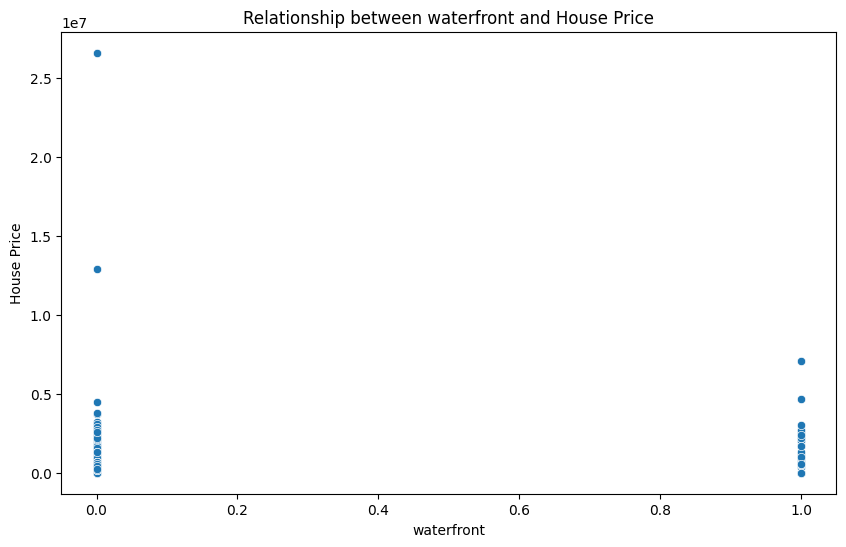

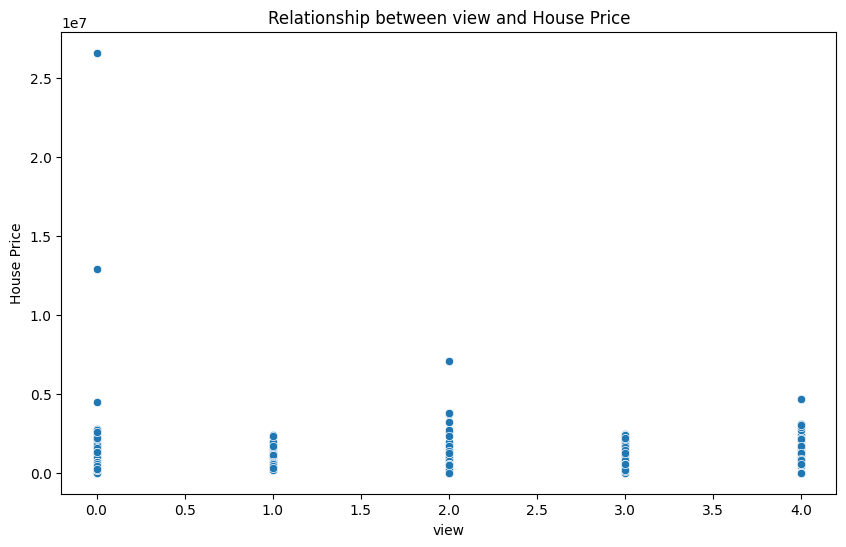

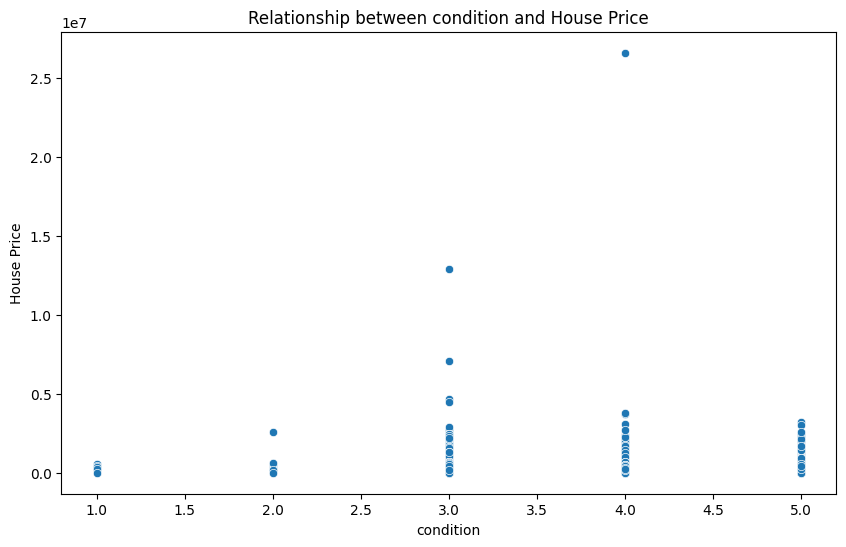

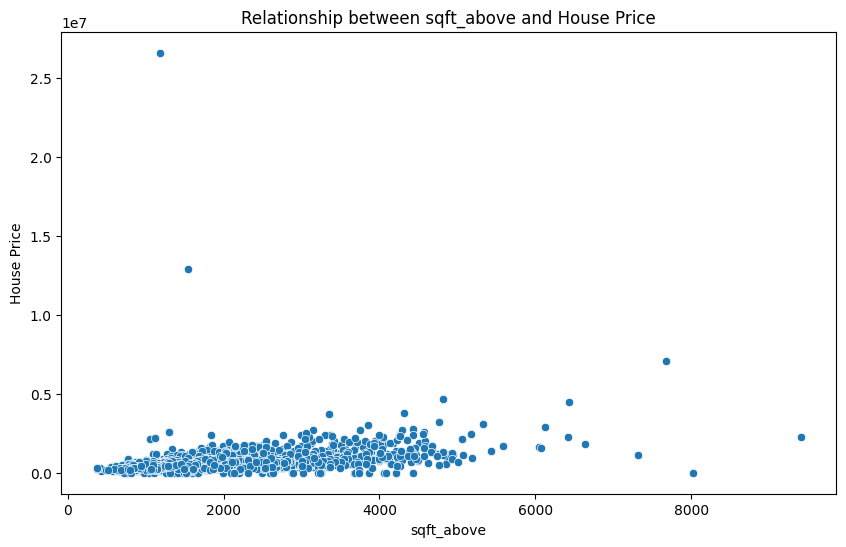

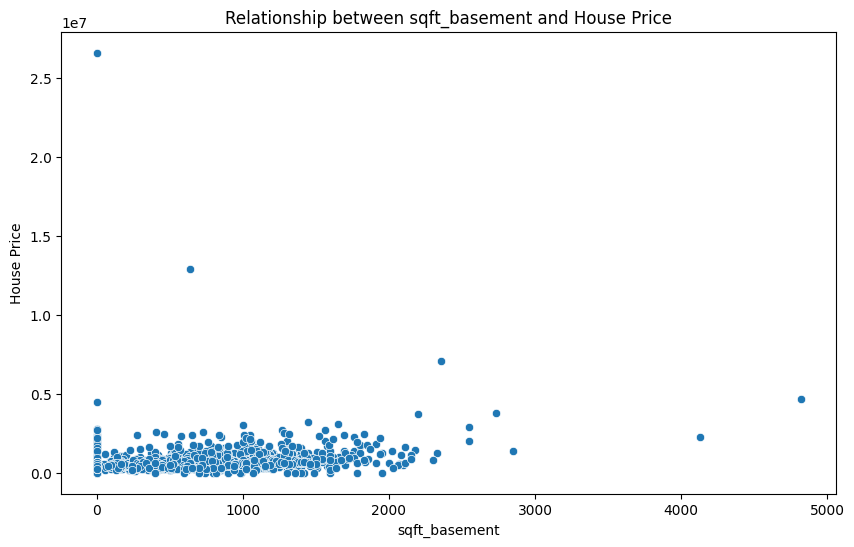

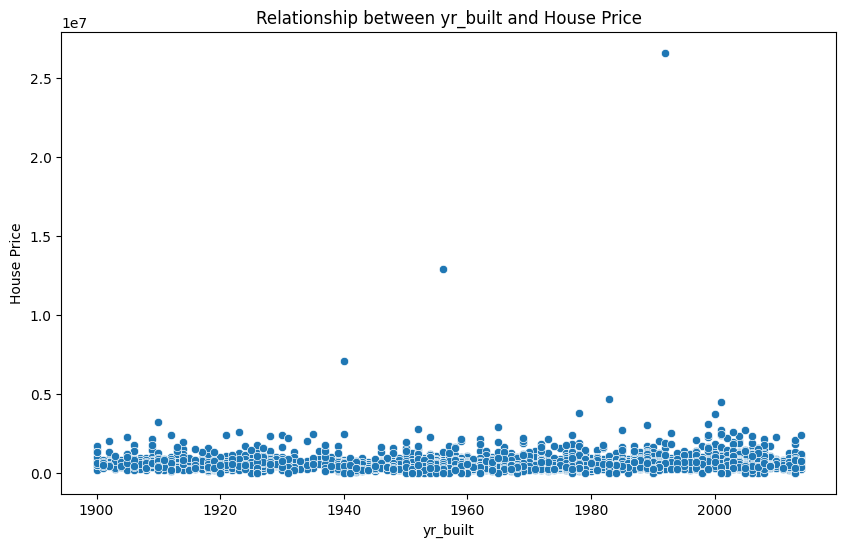

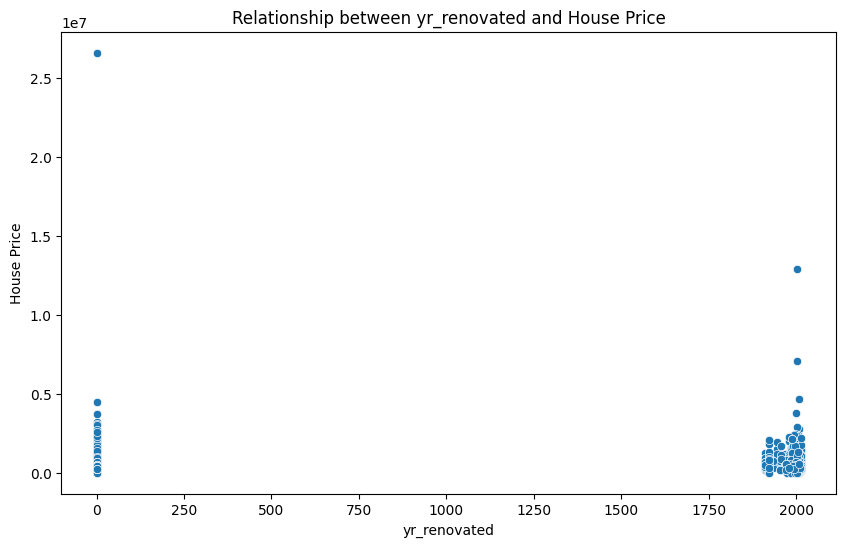

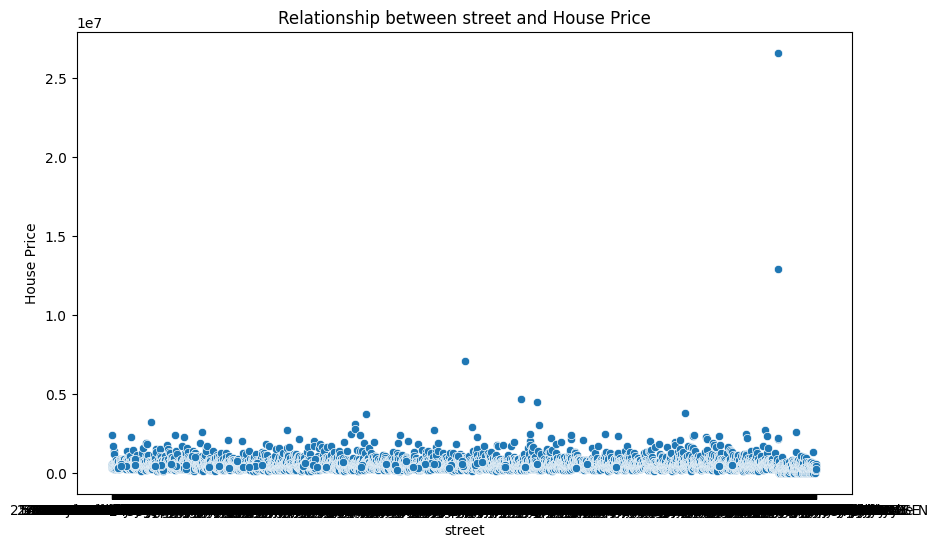

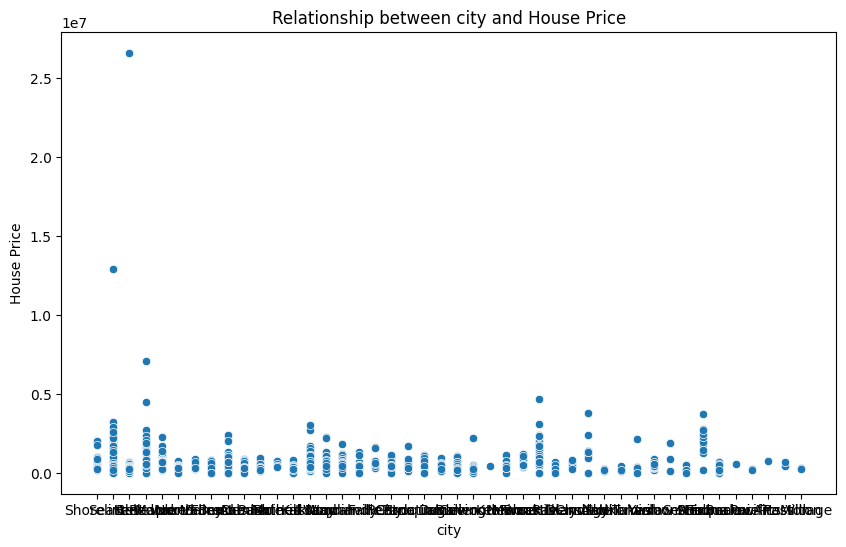

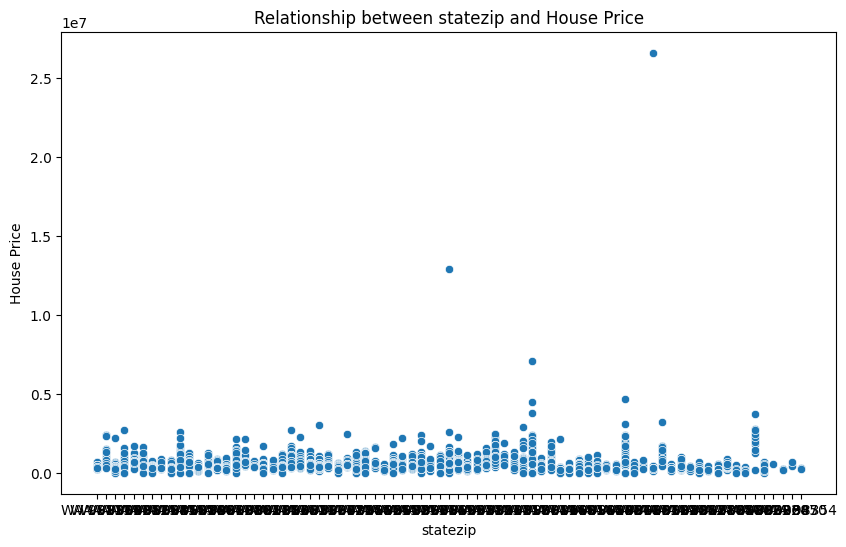

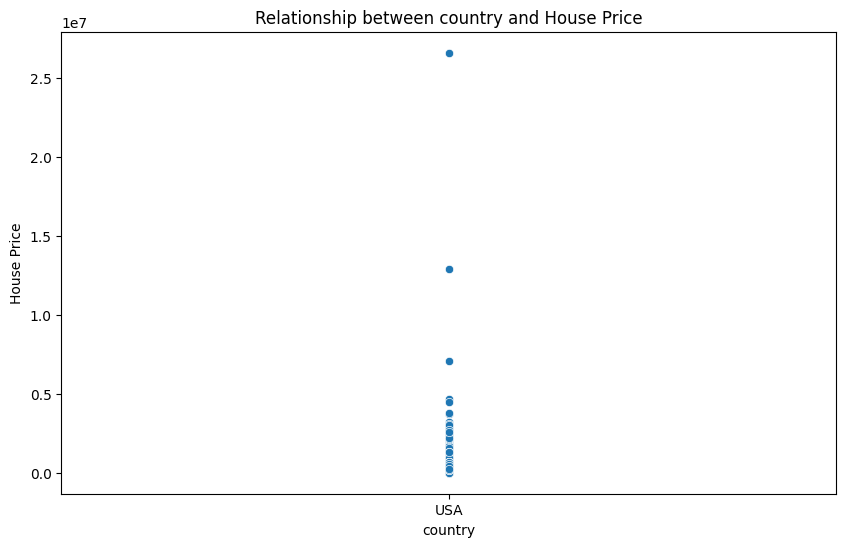

In [ ]:
# Visualize relationships between features and the target variable
for column in X.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=X, x=column, y=Y)  # Use Y instead of 'price' for consistency
    plt.title(f'Relationship between {column} and House Price')
    plt.xlabel(column)
    plt.ylabel('House Price')
    plt.show()

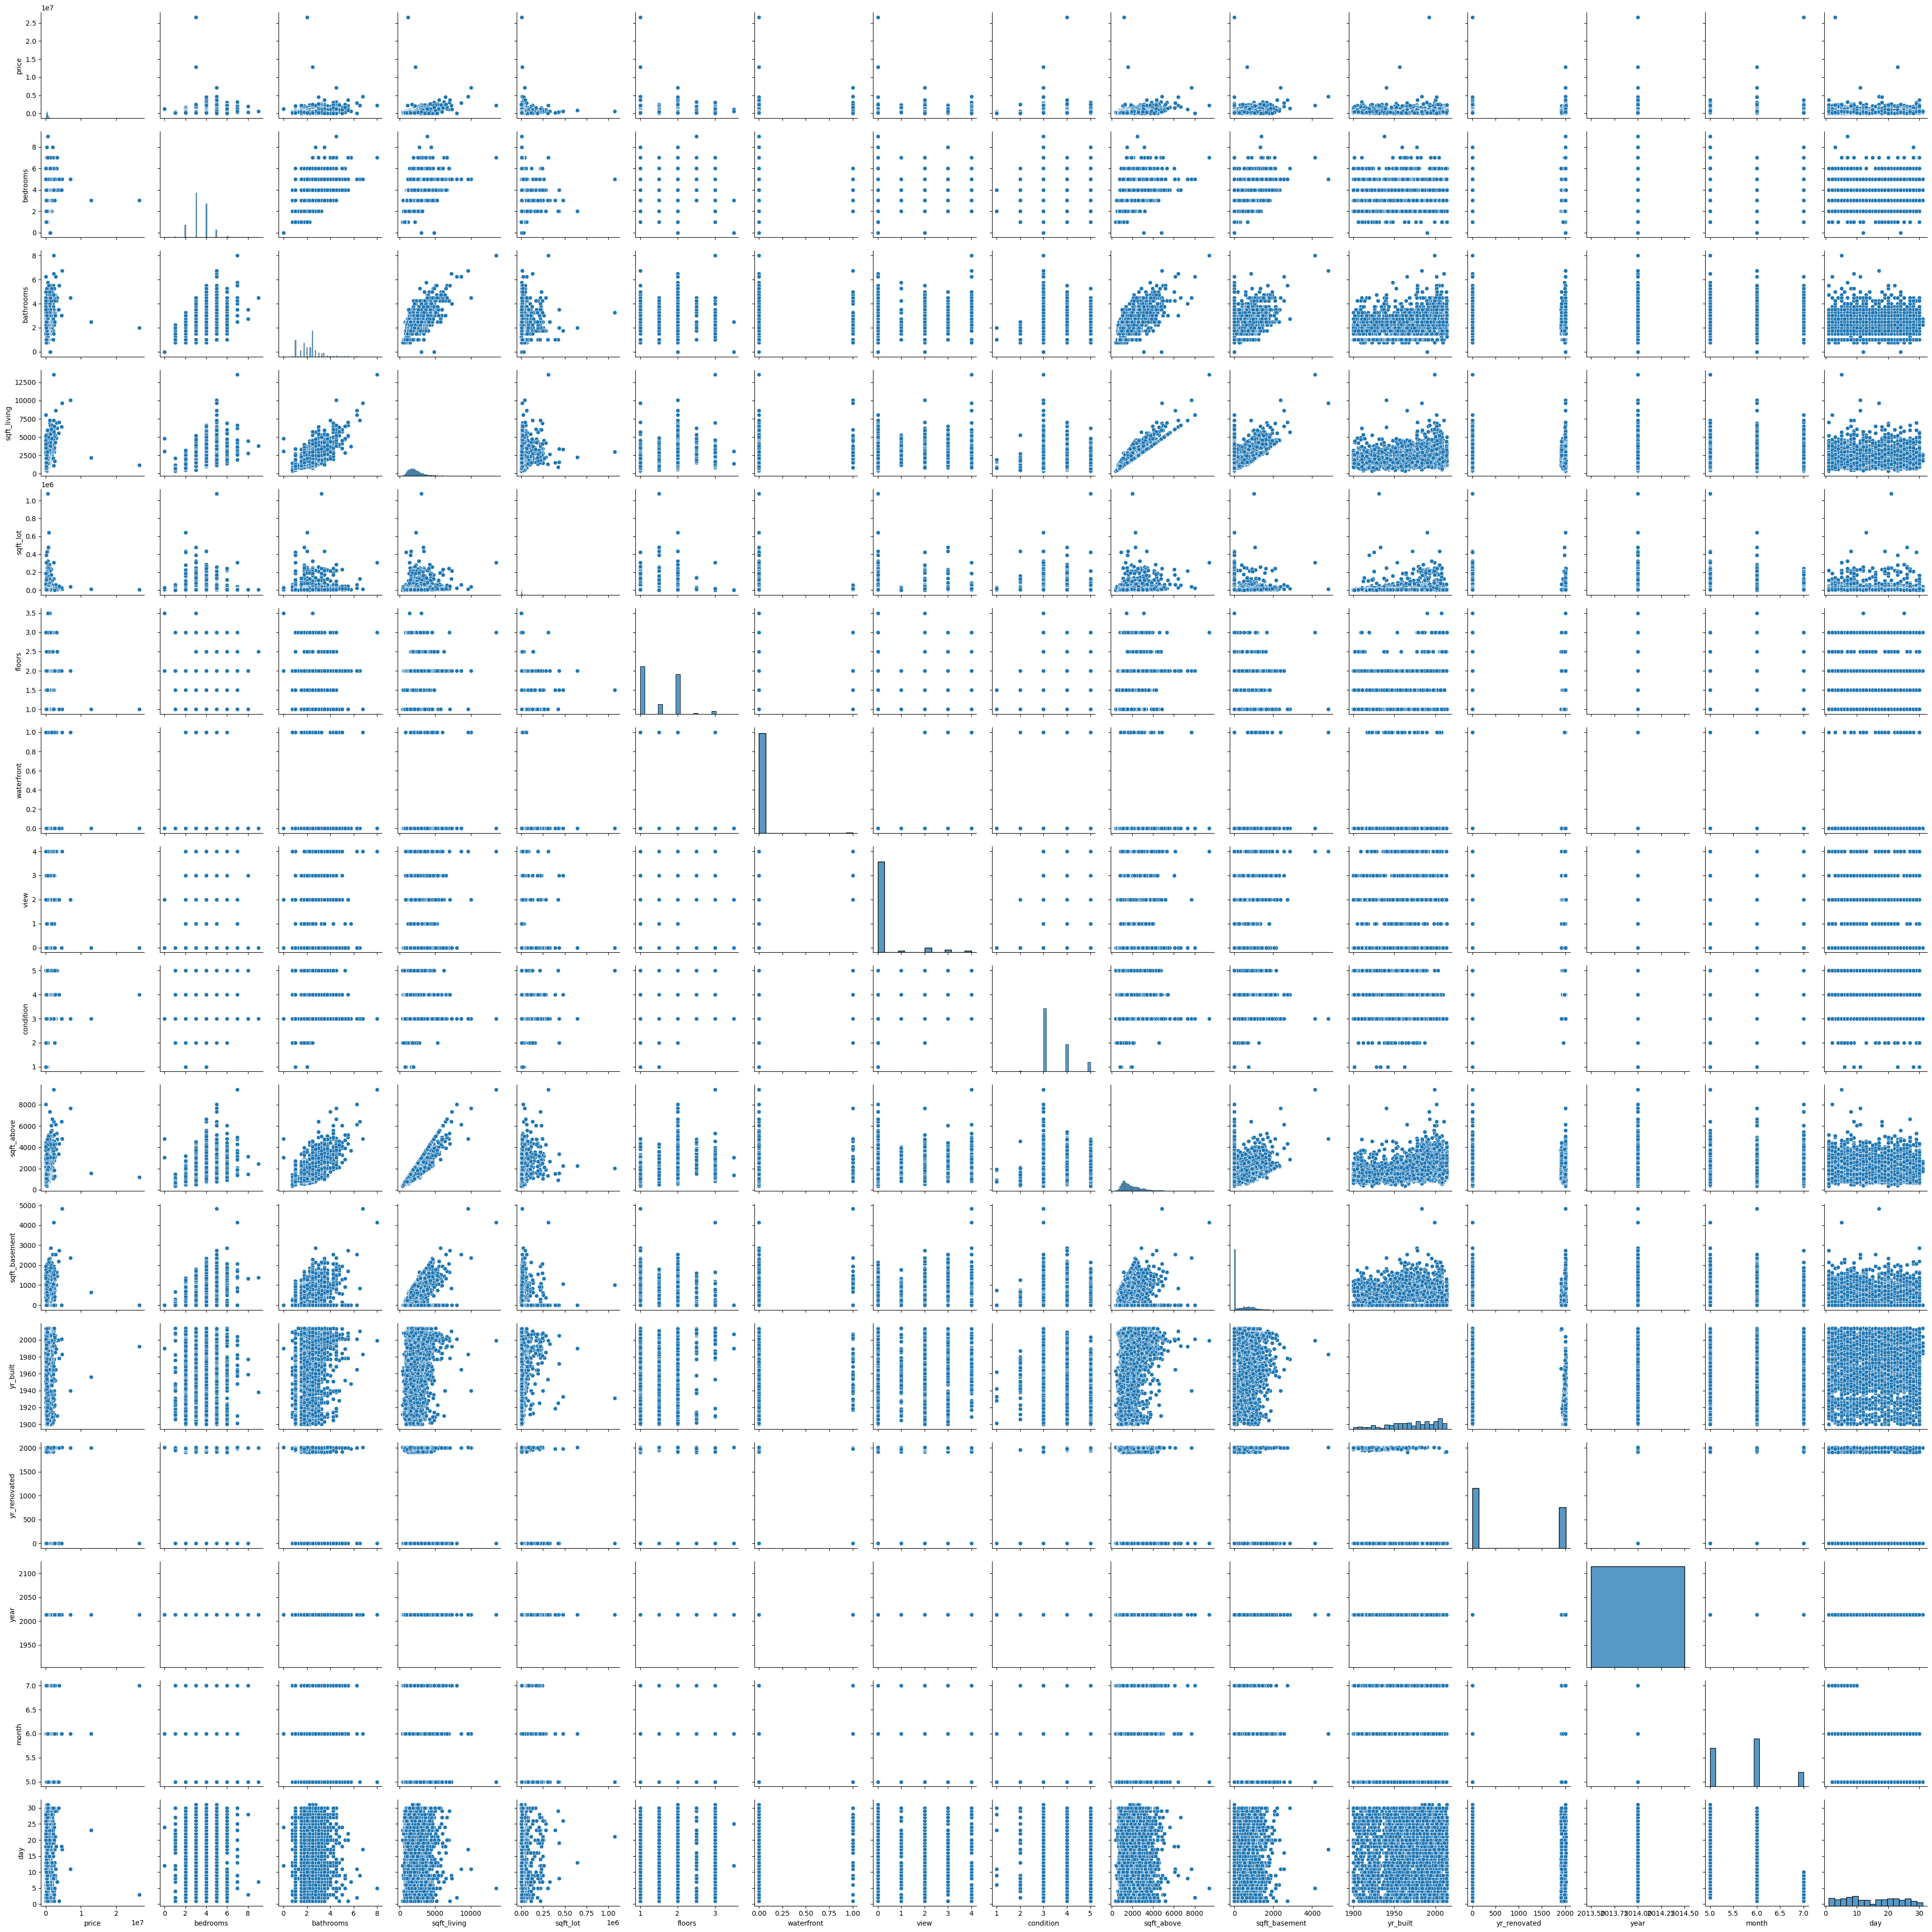

In [ ]:
sns.pairplot(df)

In [ ]:
df["price"].value_counts()

price
0.0          49
300000.0     42
400000.0     31
440000.0     29
450000.0     29
             ..
684680.0      1
609900.0      1
1635000.0     1
1339000.0     1
220600.0      1
Name: count, Length: 1741, dtype: int64

In [ ]:
df["street"].value_counts()

street
2520 Mulberry Walk NE     4
2500 Mulberry Walk NE     3
9413 34th Ave SW          2
6008 8th Ave NE           2
11034 NE 26th Pl          2
                         ..
1404 Broadmoor Dr E       1
3249 E Ames Lake Dr NE    1
6032 35th Ave NE          1
1006 NE Ravenna Blvd      1
18717 SE 258th St         1
Name: count, Length: 4525, dtype: int64

In [ ]:
# Select the 'price' column after grouping to calculate median on numerical data
df.drop(["view","condition","yr_renovated","yr_built"],axis=1).groupby("street")['price'].agg(np.median).T

street
1 View Ln NE           309620.0
10 W Etruria St        625000.0
100 20th Ave E         600000.0
100 24th Ave E         460000.0
100 Mt Si Pl NW        575000.0
                         ...   
Shangri-La Way NW      627000.0
Sunrise Loop Trail     754800.0
Tolt Pipeline Trail    435000.0
Trossachs Blvd SE      735000.0
Valley View Trail      693000.0
Name: price, Length: 4525, dtype: float64

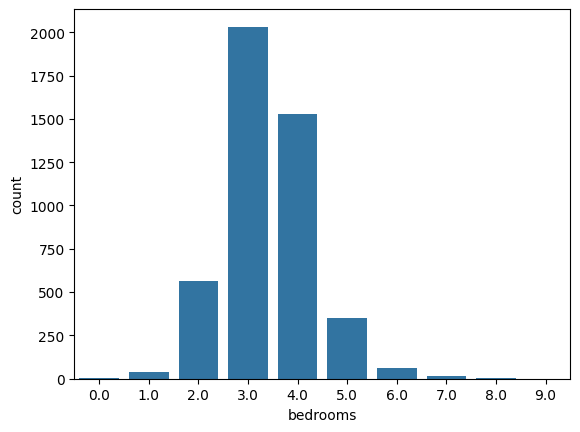

In [ ]:
sns.countplot(x="bedrooms",data=df)
plt.show()

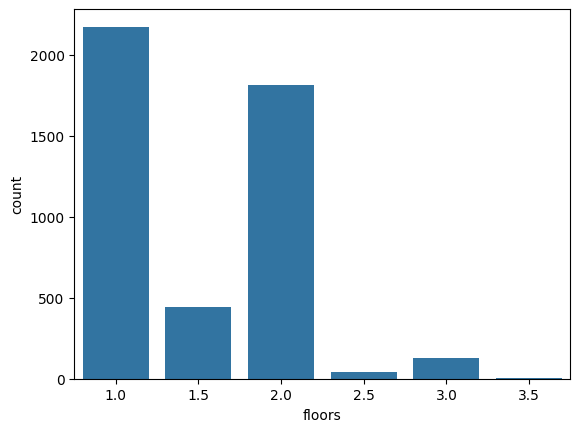

In [ ]:
sns.countplot(x="floors",data=df)
plt.show()

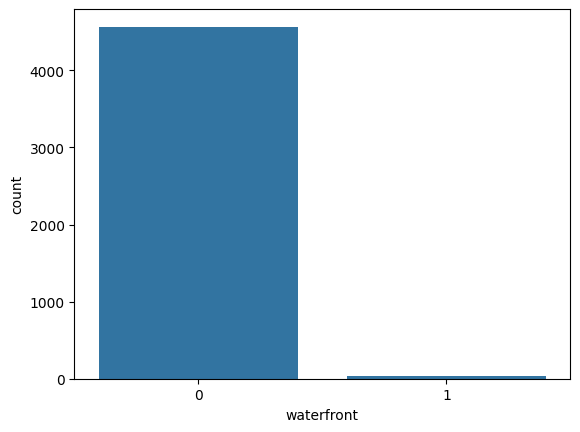

In [ ]:
sns.countplot(x="waterfront",data=df)
plt.show()

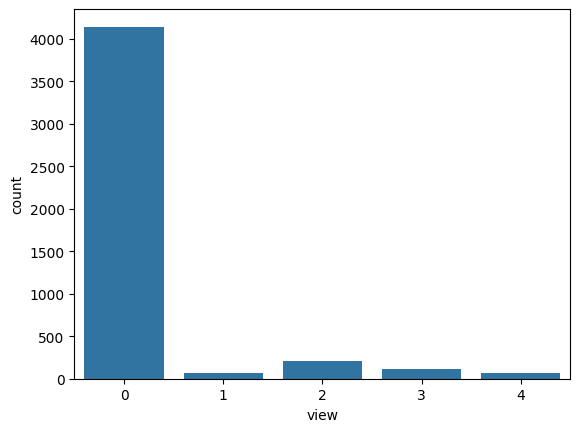

In [ ]:
sns.countplot(x="view",data=df)
plt.show()

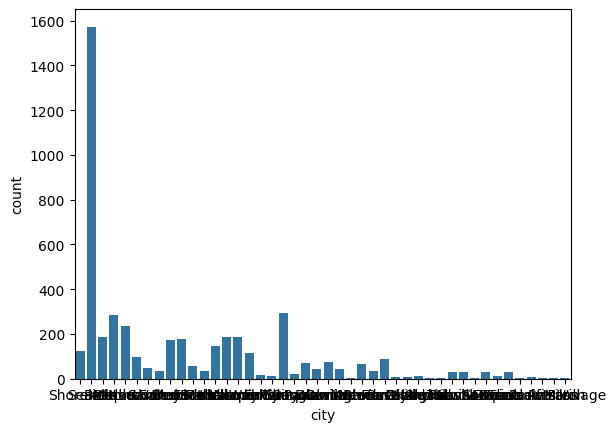

In [ ]:
sns.countplot(x="city",data=df)
plt.show()

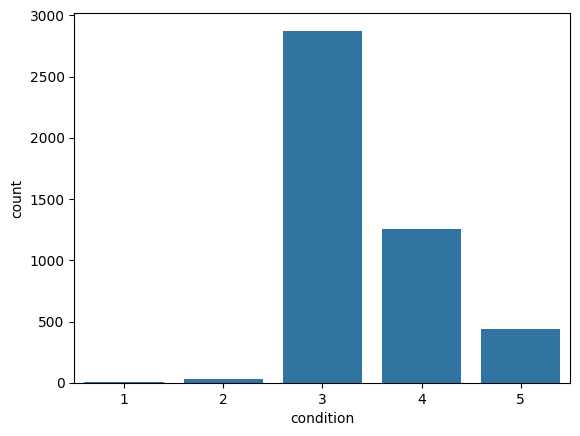

In [ ]:
sns.countplot(x="condition",data=df)
plt.show()

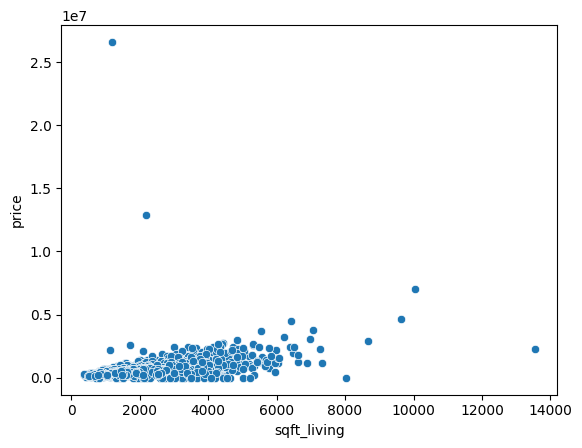

In [ ]:
sns.scatterplot(y='price',x='sqft_living',data=df)
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<function matplotlib.pyplot.show(close=None, block=None)>

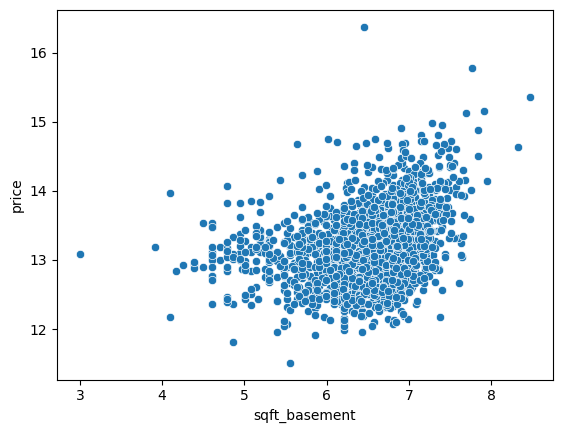

In [8]:
sns.scatterplot(x=np.log(df["sqft_basement"]),y=np.log(df["price"]))
plt.show

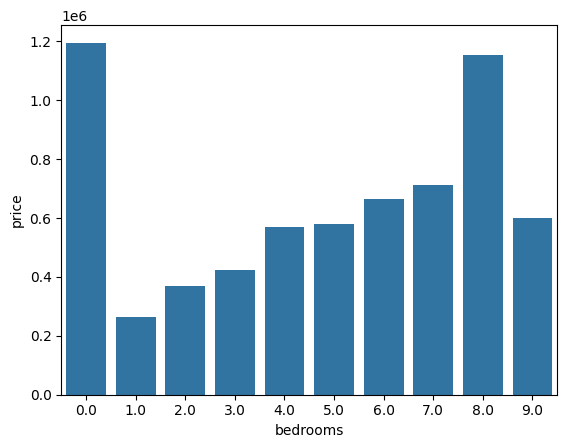

In [ ]:
temp=pd.pivot_table(data=df,values=["price"],index="bedrooms",aggfunc="median")
sns.barplot(x=temp.index,y=temp.price)
plt.show()

In [13]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**# Define models**

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regression': RandomForestRegressor(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
         }

----**Linear Regression**----

In [21]:
# Function to evaluate models
def evaluate_model(model, X_train, X_test, Y_train, Y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mae, mse, r2

In [22]:
numerical_features = X_train.select_dtypes(include=['float', 'int']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [23]:
# Create a pipeline for preprocessing and modeling
pipeline_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [24]:
# Train the model
pipeline_lr.fit(X_train, y_train)

# Make predictions
y_pred_lr = pipeline_lr.predict(X_test)

In [25]:
# Evaluate the model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression:")
print(f"MAE: {mae_lr}")
print(f"MSE: {mse_lr}")
print(f"R2: {r2_lr}")

Linear Regression:
MAE: 302652.0602336689
MSE: 1151771120999.9204
R2: -0.1293575078199698


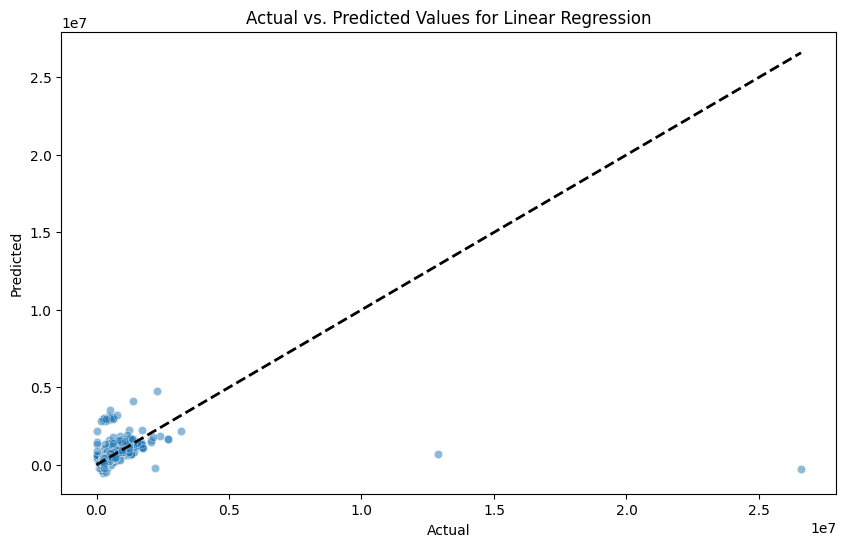

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values for Linear Regression')
plt.show()

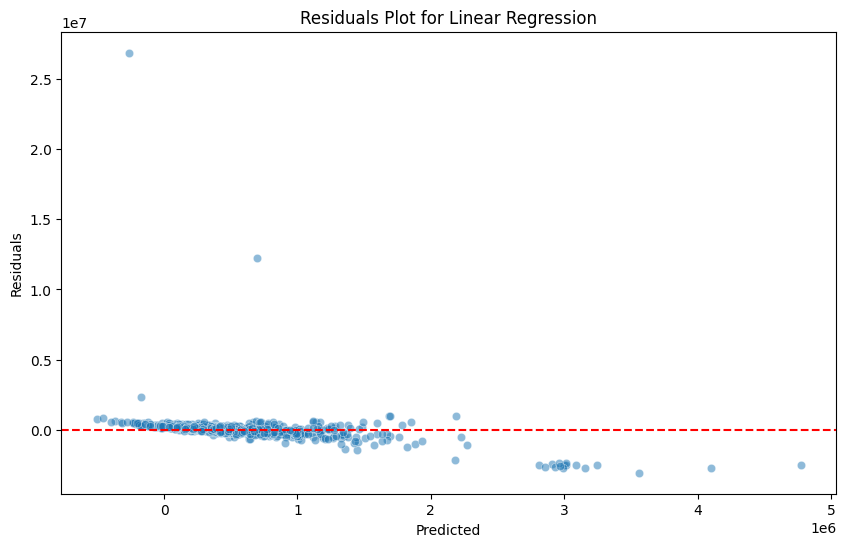

In [28]:
# Plot Residuals
residuals = y_test - y_pred_lr
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_lr, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals Plot for Linear Regression')
plt.show()

----**Random Forest Regression**----

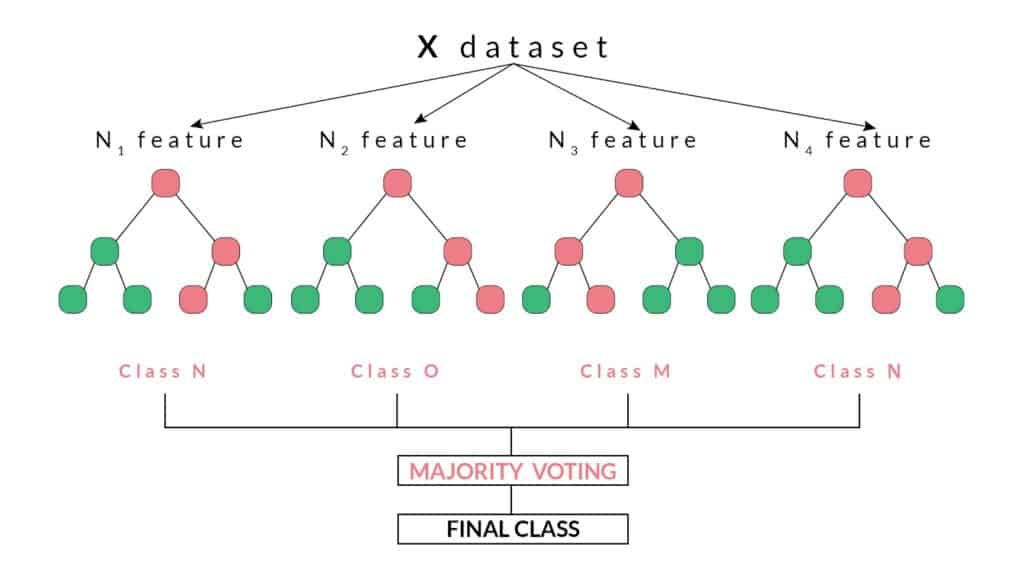

In [10]:
# Define numerical_features (replace with your actual list of numerical features)
numerical_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
                       'sqft_basement', 'yr_built']

# Create a pipeline for preprocessing and modeling
pipeline_rf = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', StandardScaler(), numerical_features),  # Apply StandardScaler to numerical features only
    ], remainder='drop')),  # Drop non-numerical columns
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [14]:
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestRegressor(random_state=42))
])

# Entraîner le modèle
pipeline_rf.fit(X_train, y_train)

# Faire des prédictions
y_pred_rf = pipeline_rf.predict(X_test)

# Évaluer le modèle
print("\nRandom Forest Regression")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))


Random Forest Regression
MAE: 157330.68120412718
MSE: 969704093579.4135
R2 Score: 0.04916647198367741


**----Decision Tree Regression----**

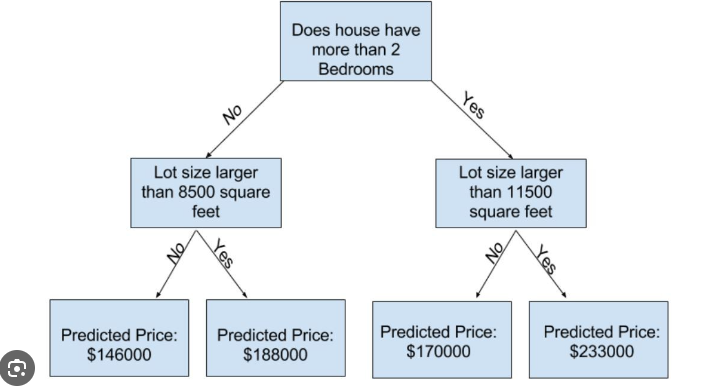

In [30]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Define categorical and numerical columns
# Replace these with your actual column names from the dataset
categorical_cols = ['address_column']  # Example categorical columns
numeric_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                'waterfront', 'view', 'condition', 'grade', 'sqft_above',
                'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
                'lat', 'long', 'date']  # Example numeric columns

# Ensure all specified columns exist in the DataFrame
existing_columns = set(df.columns)
categorical_cols = [col for col in categorical_cols if col in existing_columns]
numeric_cols = [col for col in numeric_cols if col in existing_columns]

# Separate the features (X) and the target (y)
# Replace 'price' with the actual target column name in your dataset
X = df.drop('price', axis=1)
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the 'date' column to datetime objects if it exists
if 'date' in X_train.columns:
    X_train['date'] = pd.to_datetime(X_train['date'])
    X_test['date'] = pd.to_datetime(X_test['date'])

    # Convert datetime objects to numerical features (e.g., ordinal encoding)
    X_train['date'] = X_train['date'].apply(lambda x: x.toordinal())
    X_test['date'] = X_test['date'].apply(lambda x: x.toordinal())

# Preprocessing pipeline for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Scale numeric data
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical data
])

# Column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create a pipeline with preprocessing and the Decision Tree Regressor
pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Train the model
pipeline_dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = pipeline_dt.predict(X_test)

# Evaluate the model
print("\nDecision Tree Regression")
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("R2 Score:", r2_score(y_test, y_pred_dt))



Decision Tree Regression
MAE: 279963.25546124455
MSE: 1078026343344.2365
R2 Score: -0.05704781296005956


**--Gradient Boosting--**

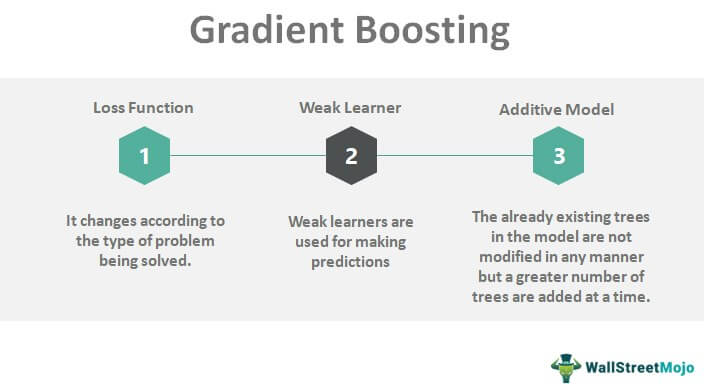

In [50]:
object_cols = X_train.select_dtypes(include='object').columns
transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), object_cols)
    ],
    remainder='passthrough'
)


X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

gb_regressor = GradientBoostingRegressor(
    loss='squared_error',
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3,
    random_state=42
)
gb_regressor.fit(X_train_transformed, y_train)  # Use transformed data

# Predict on the test data (use transformed data)
y_pred = gb_regressor.predict(X_test_transformed)# Evaluate the model
MSE = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {MSE}")
# Evaluate the model
MSE = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {MSE}")

Mean Squared Error: 967046863329.1108
Mean Squared Error: 967046863329.1108
